In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker
import math
from typing import Optional, List
from sortedcontainers import SortedDict
from Plasma import Plasma_Evolver
from scipy import interpolate
import itertools
from Analyzer import Plasma_Analyzer, Plasma_Plotter
from numpy.fft import fft, ifft

In [3]:
def delta_freq(delta):
    return np.sqrt(1 - ((2 * delta) / (1 + 4*delta**2))**2)

In [4]:
num_deltas = 3
num_epsilons = 1
d0=0.2
e0=0.2

delta_list = np.logspace(0, -num_deltas + 1, num_deltas, True, 2) * d0
epsilon_list = np.logspace(0, -num_epsilons + 1, num_epsilons, True, 2) * e0

In [5]:
N = 2
dt = 0.02
tmax = 50
t = np.arange(0, tmax + dt, dt)



In [6]:
    
def delta_analysis_plot(eps, d0, num_deltas):
    delta_list = np.logspace(0, -num_deltas + 1, num_deltas, True, 2) * d0
    plasmas = []

    for i, delta in enumerate(delta_list):
        driver = Plasma_Evolver(N, dt, epsilon_in=eps, delta_in=delta, insertion=False, rk = True, N_streams=1)
        driver.evolve_plasma(tmax)
        analyzer = Plasma_Analyzer(driver)
        plasmas.append(analyzer)

    fig, axs = plt.subplots(num_deltas, 1, figsize=(8,1 + 2*num_deltas), dpi=150, layout='constrained')
    fig.suptitle("Linear Stability Analysis for a System of $N = 2$, $\epsilon = {}$".format(eps))

    for i, (analyzer, ax) in enumerate(zip(plasmas, axs)):
        ax.set_title(r"$\delta = {}$".format(delta_list[i]))
        pred = eps * np.cos(delta_freq(delta_list[i]) * t) + 0.25
        ax.plot(t, analyzer.get_particle_pos(0,0), linewidth=1.2, linestyle='-', label='Simulation')
        ax.plot(t, pred, linewidth=0.8, linestyle='--', label='Linear Approx') 
        ax.grid()
        ax.legend(fontsize=7, loc="upper right")
        ax.set_ylabel("Position", fontsize=10)
    axs[-1].set_xlabel("Time", fontsize=10)
    plt.show()

def epsilon_analysis_plot(delta, e0, num_epsilons):
    epsilon_list = np.logspace(0, -num_epsilons + 1, num_epsilons, True, 2) * d0
    plasmas = []

    for i, epsilon in enumerate(epsilon_list):
        driver = Plasma_Evolver(N, dt, epsilon_in=epsilon, delta_in=delta, insertion=False, rk = True, N_streams=1)
        driver.evolve_plasma(tmax)
        analyzer = Plasma_Analyzer(driver)
        plasmas.append(analyzer)

    fig, axs = plt.subplots(num_epsilons, 1, figsize=(8,1 + 2*num_epsilons), dpi=150, layout='constrained')
    fig.suptitle("Linear Stability Analysis for a System of $N = 2$, $\delta = {}$".format(delta))

    for i, (analyzer, ax) in enumerate(zip(plasmas, axs)):
        ax.set_title(r"$\epsilon = {}$".format(epsilon_list[i]))
        pred = epsilon_list[i] * np.cos(delta_freq(delta) * t) + 0.25
        ax.plot(t, analyzer.get_particle_pos(0,0), linewidth=1.2, linestyle='-', label='Simulation')
        ax.plot(t, pred, linewidth=0.8, linestyle='--', label='Linear Approx') 
        ax.grid()
        ax.legend(fontsize=7, loc="upper right")
        ax.set_ylabel("Position", fontsize=10)
    axs[-1].set_xlabel("Time", fontsize=10)
    plt.show()



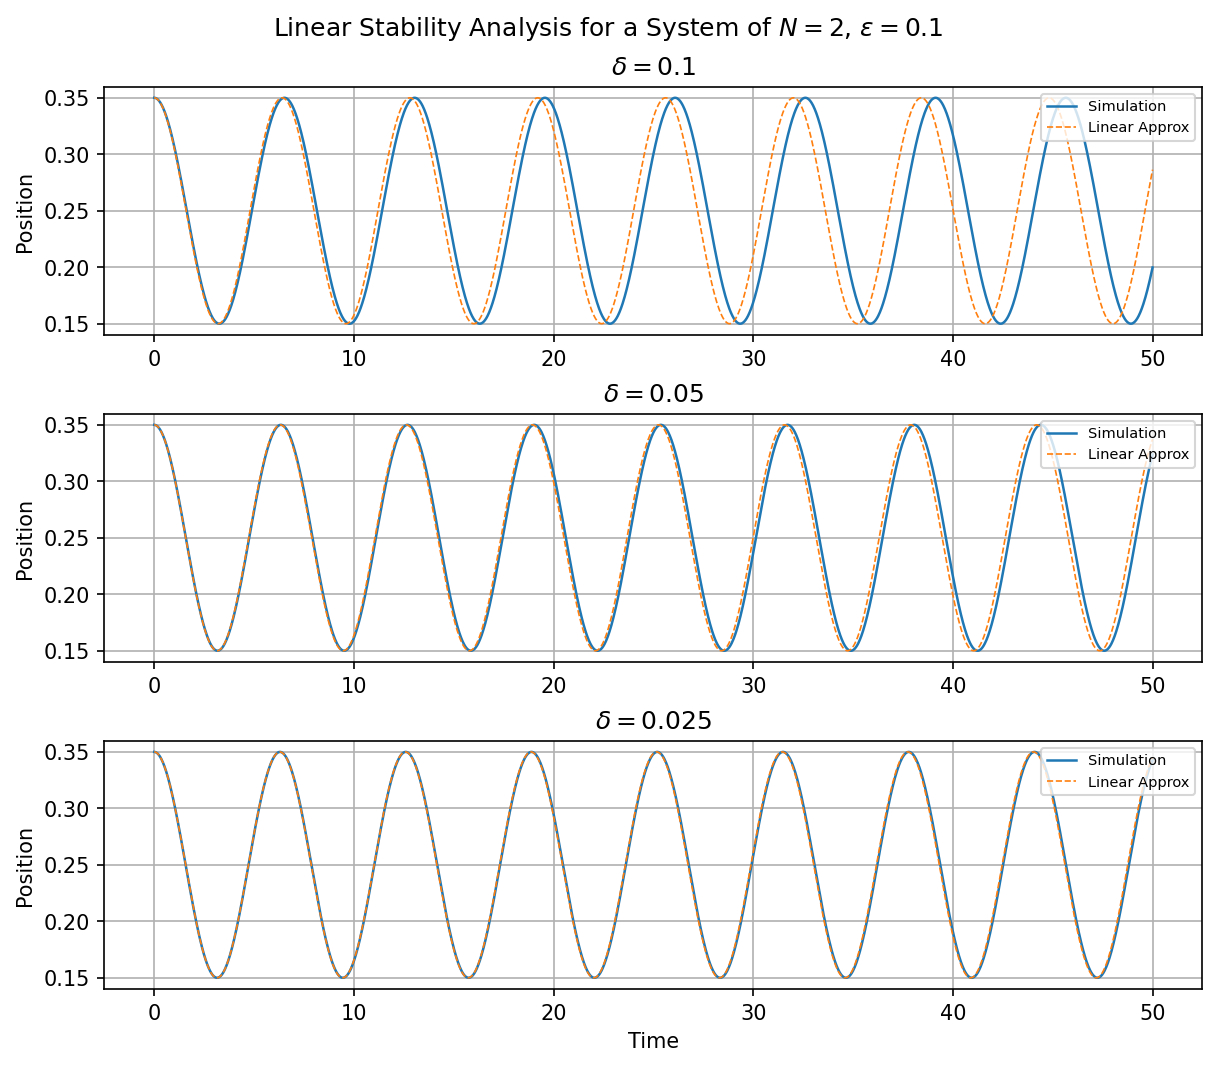

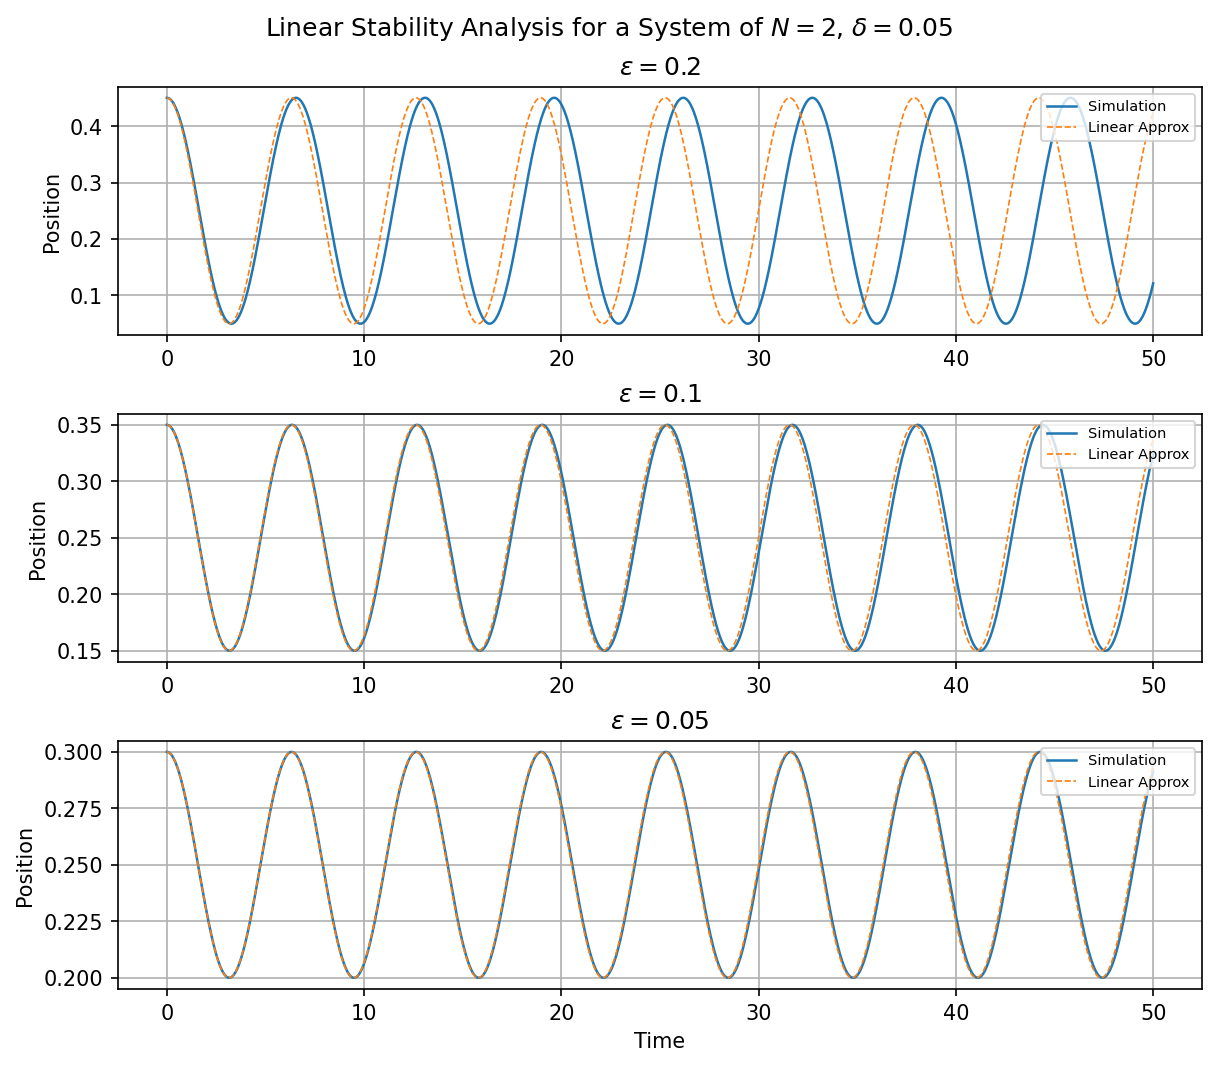

In [7]:
delta_analysis_plot(0.1, 0.1, 3)
epsilon_analysis_plot(0.05, 0.1, 3)